In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as m
import sklearn as sk

In [2]:
df=pd.read_csv('patient_freg.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.shape

(4240, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<AxesSubplot:>

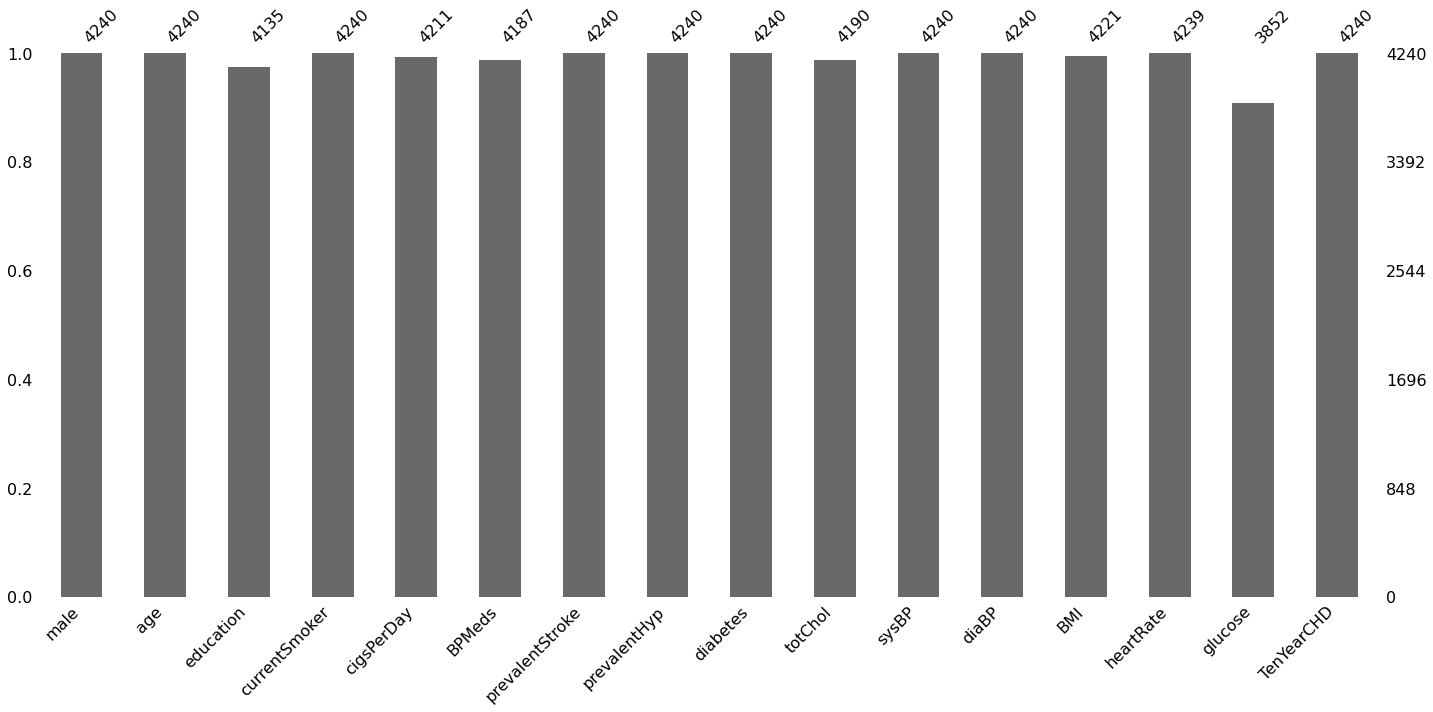

In [7]:
m.bar(df)

<AxesSubplot:>

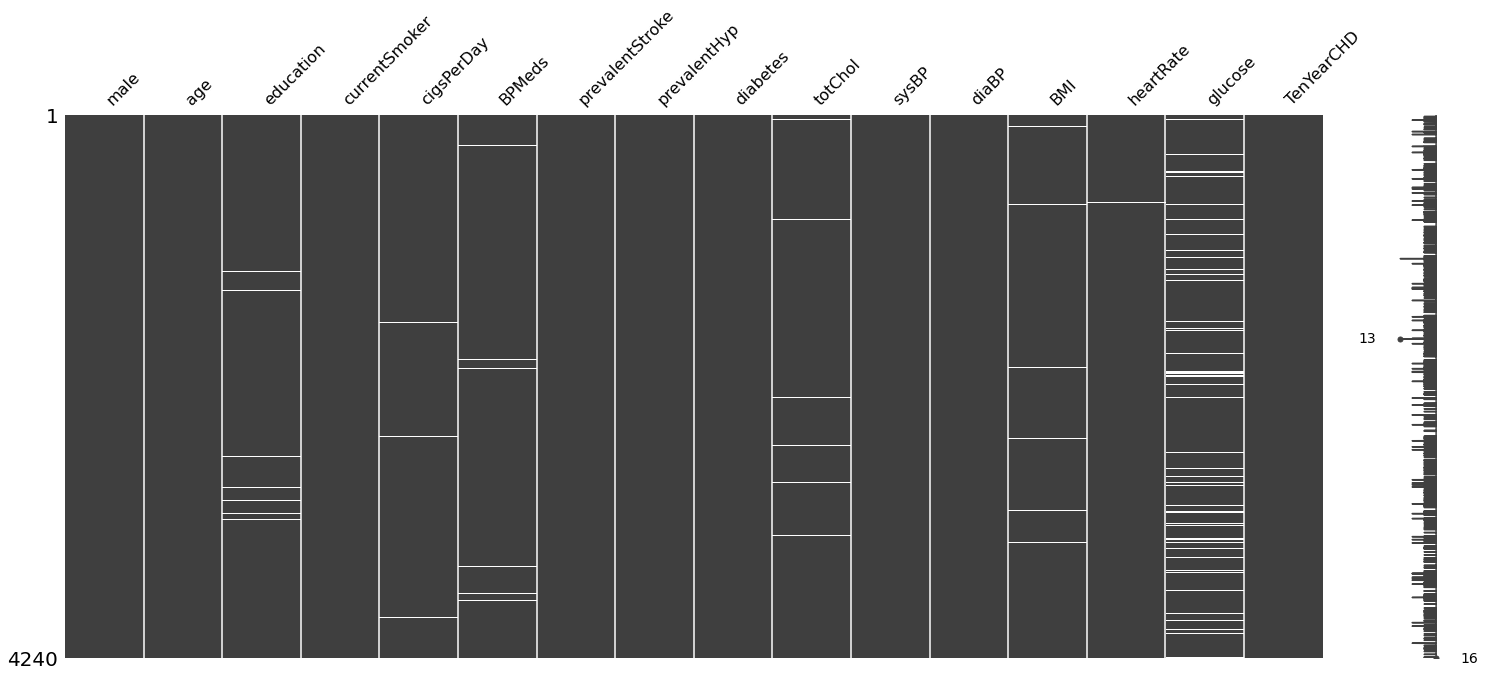

In [8]:
m.matrix(df)

<AxesSubplot:>

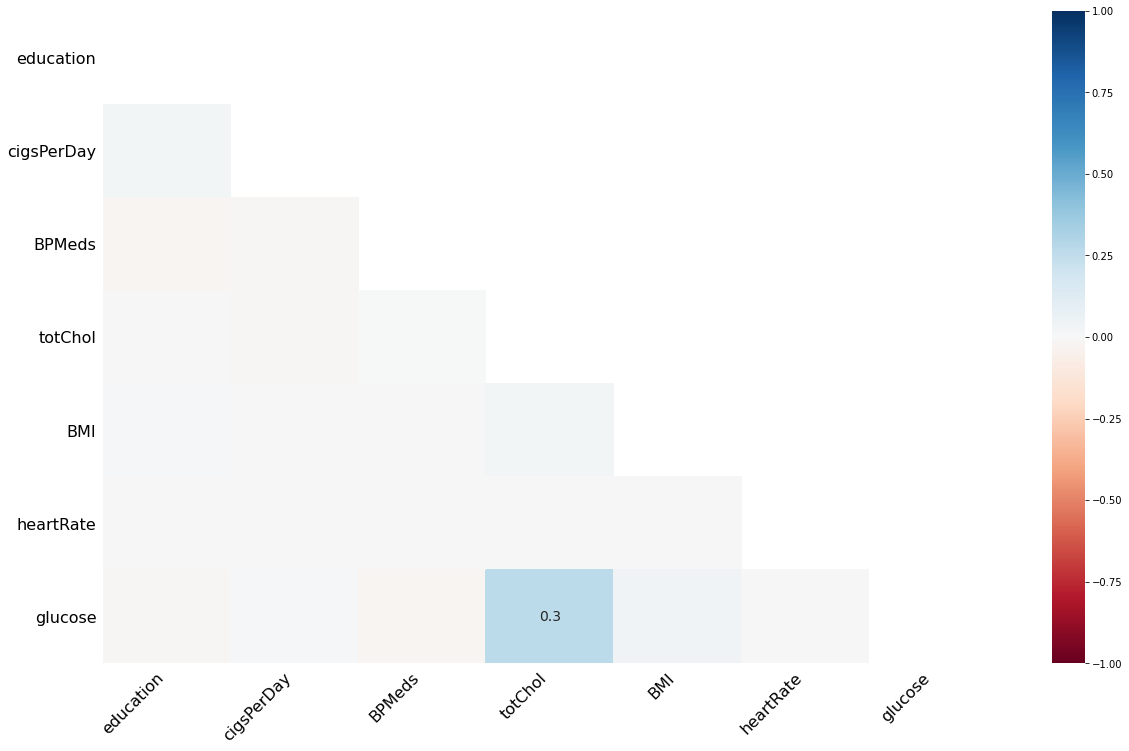

In [9]:
m.heatmap(df)

<AxesSubplot:>

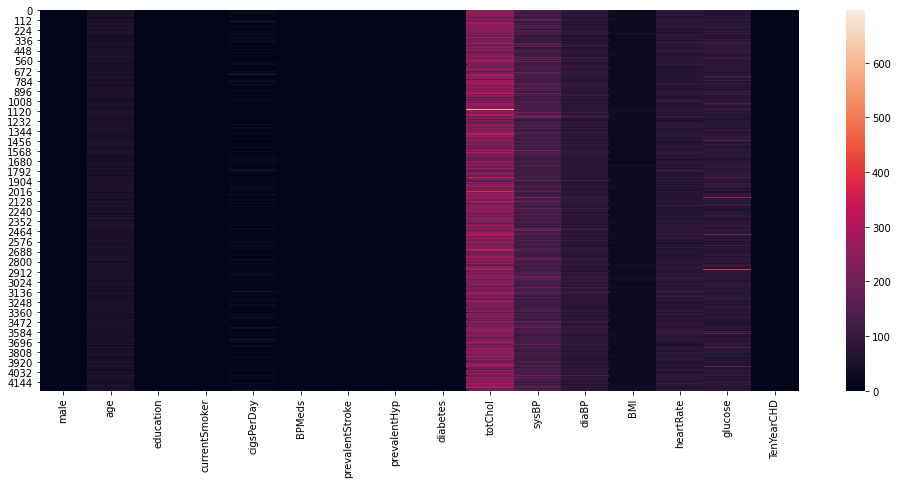

In [10]:
plt.subplots(figsize=(17,7))
sns.heatmap(df)

In [11]:
c=df.isnull().sum()
c

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
d=df.isnull().count()

In [13]:
h=df.isnull().sum() / df.isnull().count()
h

male               0.000000
age                0.000000
education          0.024764
currentSmoker      0.000000
cigsPerDay         0.006840
BPMeds             0.012500
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.091509
TenYearCHD         0.000000
dtype: float64

In [14]:
f=pd.concat([c,h],axis=1)

In [15]:
f

,0,1
male,0,0.000000
age,0,0.000000
education,105,0.024764
currentSmoker,0,0.000000
cigsPerDay,29,0.006840
BPMeds,53,0.012500
prevalentStroke,0,0.000000
prevalentHyp,0,0.000000
diabetes,0,0.000000
totChol,50,0.011792


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'male'),
  Text(1, 0, 'age'),
  Text(2, 0, 'education'),
  Text(3, 0, 'currentSmoker'),
  Text(4, 0, 'cigsPerDay'),
  Text(5, 0, 'BPMeds'),
  Text(6, 0, 'prevalentStroke'),
  Text(7, 0, 'prevalentHyp'),
  Text(8, 0, 'diabetes'),
  Text(9, 0, 'totChol'),
  Text(10, 0, 'sysBP'),
  Text(11, 0, 'diaBP'),
  Text(12, 0, 'BMI'),
  Text(13, 0, 'heartRate'),
  Text(14, 0, 'glucose'),
  Text(15, 0, 'TenYearCHD')])

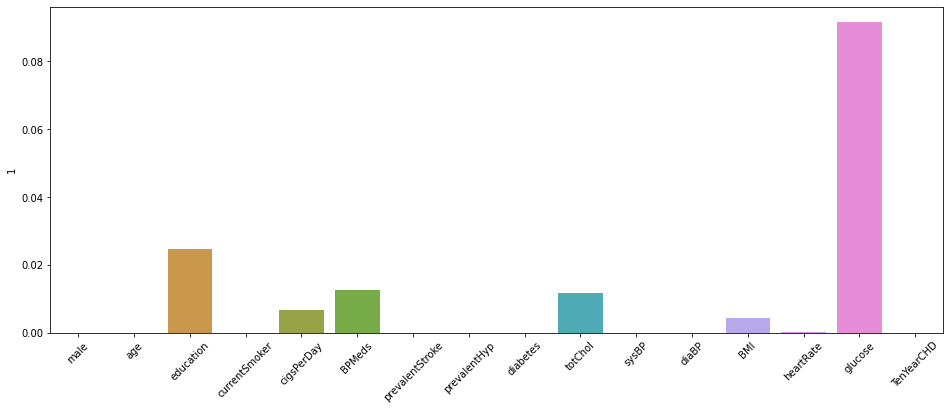

In [16]:
plt.subplots(figsize=(16,6))
sns.barplot(x=f.index,y=f[1])
plt.xticks(rotation=45)



c:\users\sys\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


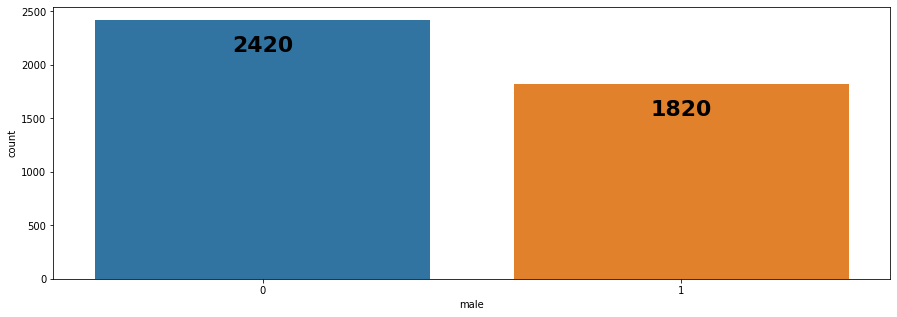

In [17]:
plt.subplots(figsize=(15,5))
sns.countplot('male',data=df)
x=df['male'].value_counts()
for i,v in enumerate(x):
    plt.text(i,v-300,str(v),size=22,horizontalalignment='center',weight='bold')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

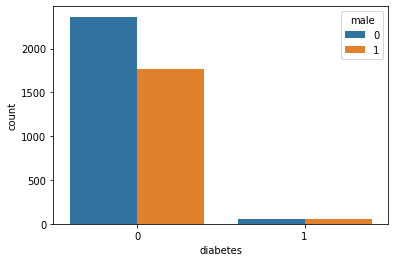

In [18]:
sns.countplot(x='diabetes',hue='male',data=df)

c:\users\sys\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x12bfd190>,
 [Text(0, 0, 'yes'), Text(1, 0, 'no')])

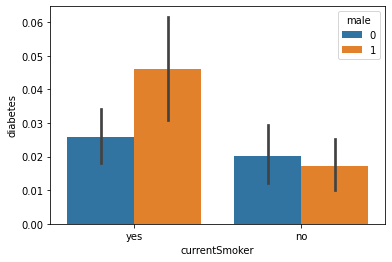

In [19]:
sns.barplot('currentSmoker','diabetes',hue='male',data=df)
plt.xticks(np.arange(2),['yes','no'])

In [20]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [21]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
df['BPMeds'].unique()

array([ 0.,  1., nan])

In [23]:
df['BPMeds'].value_counts()

0.0    4063
1.0     124
Name: BPMeds, dtype: int64

In [24]:
df['BPMeds'].fillna(0,inplace=True)

In [25]:
df['BPMeds'].isnull().values.any()

False

In [26]:
df['BPMeds'].mode()

0    0.0
dtype: float64

In [27]:
df['BPMeds'].max()

1.0

In [28]:
df['BPMeds'].value_counts()

0.0    4116
1.0     124
Name: BPMeds, dtype: int64

In [29]:
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)
df['glucose'].fillna(df['glucose'].mean(),inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(),inplace=True)
df['totChol'].fillna(df['totChol'].mean(),inplace=True)


In [30]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [31]:
df['BMI'].unique()

array([26.97, 28.73, 25.34, ..., 26.7 , 43.67, 20.91])

In [32]:
df['cigsPerDay'].unique()

array([ 0.        , 20.        , 30.        , 23.        , 15.        ,
        9.        , 10.        ,  5.        , 35.        , 43.        ,
        1.        , 40.        ,  3.        ,  2.        ,  9.00593683,
       12.        ,  4.        , 18.        , 25.        , 60.        ,
       14.        , 45.        ,  8.        , 50.        , 13.        ,
       11.        ,  7.        ,  6.        , 38.        , 29.        ,
       17.        , 16.        , 19.        , 70.        ])

In [33]:
from sklearn.impute import SimpleImputer as s
a=s(missing_values=np.nan,strategy='most_frequent')
df[['BPMeds','education']]=a.fit_transform(df[['BPMeds','education']])

In [34]:
df.iloc[:,[2,5]]=df.iloc[:,[2,5]].apply(lambda x:x.fillna(x.mode()[0]))

In [35]:
df.iloc[:,[2,5]].apply(lambda x:x.mode()[0])

education    1.0
BPMeds       0.0
dtype: float64

In [36]:
df.iloc[:,[2,5]].mode()

,education,BPMeds
0,1.0,0.0


In [37]:
df.iloc[:,2].unique()

array([4., 2., 1., 3.])

In [38]:
df.iloc[:,5].unique()

array([0., 1.])

In [39]:
df.iloc[:,2].value_counts()

1.0    1825
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [40]:
df.iloc[:,5].value_counts()

0.0    4116
1.0     124
Name: BPMeds, dtype: int64

In [41]:
df.isna().values.any()

False

In [43]:
y=df.iloc[:,df.columns=='TenYearCHD']
x=df.iloc[:,df.columns!='TenYearCHD']

In [44]:
from sklearn.model_selection import train_test_split as d
x_train,x_test,y_train,y_test=d(x,y,random_state=34,test_size=.20)

In [49]:
from sklearn.ensemble import RandomForestClassifier as f
f=f(n_jobs=4,oob_score=True,n_estimators=100,criterion='entropy')
f=f.fit(x_train,y_train)
pred=f.predict(x_test)
pred


<ipython-input-49-329d029d4224>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  f=f.fit(x_train,y_train)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
f.score(x_train,y_train)

0.9997051886792453

In [51]:
f.score(x_test,y_test)

0.8573113207547169